# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [81]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}q={city}&units={units}&appid={weather_api_key}"

In [83]:
#Create lists to hold data for scatterplots
temp = []
lat = []
lng = []
temp = []
humidity = []
cloud = []
wind = []

for city in cities: #not iterating lists
    response = requests.get(query_url).json()
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
#Creates dictionary to store weather data.
weather_dict = {
    "City": cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature (F)": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed (mph)": wind
    
}

#Creates data frame from dictionary of weather data
weather_data = pd.DataFrame(weather_dict)
#need to output csv

#Creates csv of the data
weather_data.to_csv('Output/weatherdata.csv', index=False)  

#Prints data frame
weather_data

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,adrar,41.3712,-73.414,69.8,60,1,8.05
1,kapaa,41.3712,-73.414,69.8,60,1,8.05
2,ushuaia,41.3712,-73.414,69.8,60,1,8.05
3,novaya ladoga,41.3712,-73.414,69.8,60,1,8.05
4,tsihombe,41.3712,-73.414,69.8,60,1,8.05
...,...,...,...,...,...,...,...
595,ambilobe,41.3712,-73.414,69.8,60,1,8.05
596,xihe,41.3712,-73.414,69.8,60,1,8.05
597,porto novo,41.3712,-73.414,69.8,60,1,8.05
598,willowmore,41.3712,-73.414,69.8,60,1,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
# For my own info, show in a dataframe cities with humidity > 100.
weather_data.loc[weather_data['Humidity'] > 100]

,City,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)


In [53]:
# Get the indices of cities that have humidity over 100%.

indexNames = weather_data[weather_data['Humidity'] > 100].index

indexNames



Int64Index([], dtype='int64')

In [54]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_weather_data = weather_data.drop(indexNames , inplace=False)
clean_weather_data



,City,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,ushuaia,60.3067,22.301,35.87,93,0,3.44
1,kavaratti,60.3067,22.301,35.87,93,0,3.44
2,mataura,60.3067,22.301,35.87,93,0,3.44
3,airai,60.3067,22.301,35.87,93,0,3.44
4,new norfolk,60.3067,22.301,35.87,93,0,3.44
...,...,...,...,...,...,...,...
611,cifuentes,60.3067,22.301,35.87,93,0,3.44
612,manokwari,60.3067,22.301,35.87,93,0,3.44
613,buckeye,60.3067,22.301,35.87,93,0,3.44
614,katsuura,60.3067,22.301,35.87,93,0,3.44


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [78]:
x_values = weather_data['Latitude']
y_values = weather_data['Max Temperature (F)']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in F')
plt.savefig('Output/LatvTemp.png')
plt.show()

KeyError: 'Max Temperature (F)'

## Latitude vs. Humidity Plot

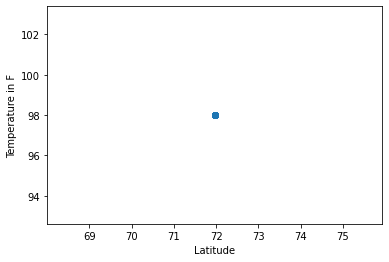

In [20]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Output/LatvHum.png')
plt.show()

## Latitude vs. Cloudiness Plot

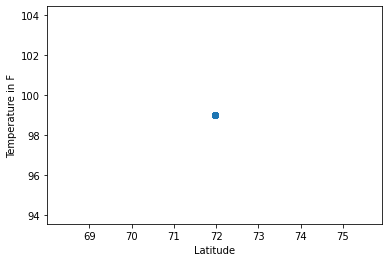

In [21]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Output/LatvCloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

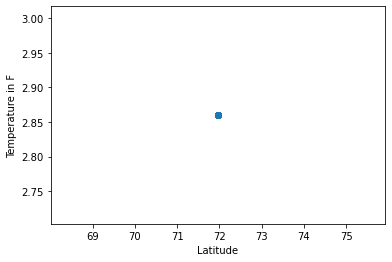

In [22]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed (mph)']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Output/LatvWind.png')
plt.show()

## Linear Regression

In [69]:
#Create Northern Hempsphere DF
northern_df = weather_data.loc[weather_data['Latitude'] >= 0]

#Create Southern Hempsphere DF
southern_df = weather_data.loc[weather_data['Latitude'] < 0]
southern_df

,City,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [72]:
 # Perform a linear regression on temperature vs. latitude #Source API Day 2 Activity 7
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in F')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvTempRegN.png')
plt.show()


KeyError: 'Max Temperature (F)'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression